## Initialisation

In [1]:
from mqt.pathfinder import cost_functions as cf
from mqt.pathfinder.graph import Graph
import mqt.pathfinder.utils as utils

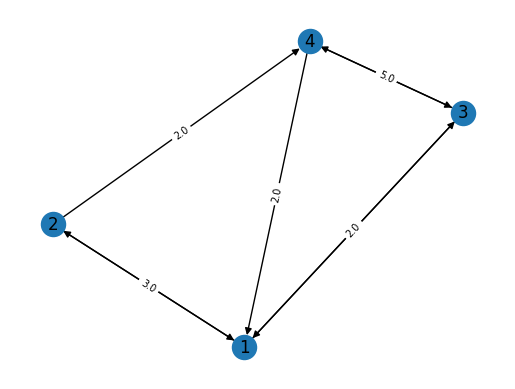

In [2]:
with open("graph", "r") as file:
    graph = Graph.read(file)
graph.plot()

## QUBO Construction

### Parameters

In [3]:
encoding_type = cf.EncodingType.ONE_HOT
n_paths = 1
max_path_length = graph.n_vertices

In [4]:
settings = cf.PathFindingQUBOGeneratorSettings(encoding_type, n_paths, max_path_length)
generator = cf.PathFindingQUBOGenerator(cf.MinimisePathLength([1], loop=True), graph, settings)

### Constraints

In [5]:
generator.add_constraint(cf.PathIsValid([1]))
generator.add_constraint(cf.PathIsLoop([1]))
generator.add_constraint(cf.PathContainsVerticesExactlyOnce(graph.all_vertices, [1]))

### Generate QUBO Formulation

In [6]:
generator.construct()

25.0*(1 - Sum(X(1, 1, i), (i, 1, 4)))**2 + 25.0*(1 - Sum(X(1, 2, i), (i, 1, 4)))**2 + 25.0*(1 - Sum(X(1, 3, i), (i, 1, 4)))**2 + 25.0*(1 - Sum(X(1, 4, i), (i, 1, 4)))**2 + 25.0*X(1, 1, 1)*X(1, 1, 4) + 25.0*X(1, 1, 4)*X(1, 4, 1) + 25.0*X(1, 2, 1)*X(1, 2, 4) + 25.0*X(1, 2, 1)*X(1, 3, 4) + 25.0*X(1, 2, 1)*X(1, 4, 4) + 25.0*X(1, 2, 4)*X(1, 3, 1) + 25.0*X(1, 3, 1)*X(1, 3, 4) + 25.0*X(1, 4, 1)*X(1, 4, 4) + 25.0*Sum(X(1, 1, i)*X(1, 1, i + 1), (i, 1, 3)) + 25.0*Sum(X(1, 1, i)*X(1, 4, i + 1), (i, 1, 3)) + 25.0*Sum(X(1, 2, i)*X(1, 2, i + 1), (i, 1, 3)) + 25.0*Sum(X(1, 2, i)*X(1, 3, i + 1), (i, 1, 3)) + 25.0*Sum(X(1, 2, i + 1)*X(1, 3, i), (i, 1, 3)) + 25.0*Sum(X(1, 2, i + 1)*X(1, 4, i), (i, 1, 3)) + 25.0*Sum(X(1, 3, i)*X(1, 3, i + 1), (i, 1, 3)) + 25.0*Sum(X(1, 4, i)*X(1, 4, i + 1), (i, 1, 3)) + 200.0*Sum((-X(1, 1, i) - X(1, 2, i) - X(1, 3, i) - X(1, 4, i) + 1)**2, (i, 1, 4)) + Sum(X(1, v, 4)*X(1, w, 1) + Sum(A(v, w)*X(1, v, i)*X(1, w, i + 1), (i, 1, 3)), (w, 1, 4), (v, 1, 4))

In [7]:
generator.construct_expansion()

225.0*X(1, 1, 1)**2 + 75.0*X(1, 1, 1)*X(1, 1, 2) + 50.0*X(1, 1, 1)*X(1, 1, 3) + 76.0*X(1, 1, 1)*X(1, 1, 4) + 400.0*X(1, 1, 1)*X(1, 2, 1) + 4.0*X(1, 1, 1)*X(1, 2, 2) + X(1, 1, 1)*X(1, 2, 4) + 400.0*X(1, 1, 1)*X(1, 3, 1) + 2.0*X(1, 1, 1)*X(1, 3, 2) + X(1, 1, 1)*X(1, 3, 4) + 400.0*X(1, 1, 1)*X(1, 4, 1) + 25.0*X(1, 1, 1)*X(1, 4, 2) + X(1, 1, 1)*X(1, 4, 4) - 450.0*X(1, 1, 1) + 225.0*X(1, 1, 2)**2 + 75.0*X(1, 1, 2)*X(1, 1, 3) + 50.0*X(1, 1, 2)*X(1, 1, 4) + 3.0*X(1, 1, 2)*X(1, 2, 1) + 400.0*X(1, 1, 2)*X(1, 2, 2) + 4.0*X(1, 1, 2)*X(1, 2, 3) + 2.0*X(1, 1, 2)*X(1, 3, 1) + 400.0*X(1, 1, 2)*X(1, 3, 2) + 2.0*X(1, 1, 2)*X(1, 3, 3) + 2.0*X(1, 1, 2)*X(1, 4, 1) + 400.0*X(1, 1, 2)*X(1, 4, 2) + 25.0*X(1, 1, 2)*X(1, 4, 3) - 450.0*X(1, 1, 2) + 225.0*X(1, 1, 3)**2 + 75.0*X(1, 1, 3)*X(1, 1, 4) + 3.0*X(1, 1, 3)*X(1, 2, 2) + 400.0*X(1, 1, 3)*X(1, 2, 3) + 4.0*X(1, 1, 3)*X(1, 2, 4) + 2.0*X(1, 1, 3)*X(1, 3, 2) + 400.0*X(1, 1, 3)*X(1, 3, 3) + 2.0*X(1, 1, 3)*X(1, 3, 4) + 2.0*X(1, 1, 3)*X(1, 4, 2) + 400.0*X(1, 1, 3)

In [8]:
A = generator.construct_qubo_matrix()
utils.print_matrix(A)

NameError: name 'utils' is not defined

## Test Results

### Brute Force Optimisation

In [ ]:
import numpy as np

(best_test, best_score) = utils.optimise_classically(A)

x = np.array(best_test)
pth = generator.decode_bit_array(best_test)
print(pth)
    

[3, 1, 2, 4]


### Operator: Classical Eigensolver

In [ ]:
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit.result import QuasiDistribution
from qiskit.quantum_info import Statevector
import numpy as np

def bitfield(n: int, L: int) -> list[int]:
    result = np.binary_repr(n, L)
    return [int(digit) for digit in result]

def sample_most_likely(state_vector: QuasiDistribution | Statevector) -> np.ndarray:
    """Compute the most likely binary string from state vector.
    Args:
        state_vector: State vector or quasi-distribution.

    Returns:
        Binary string as an array of ints.
    """
    if isinstance(state_vector, QuasiDistribution):
        values = list(state_vector.values())
    else:
        values = state_vector
    n = int(np.log2(len(values)))
    k = np.argmax(np.abs(values))
    x = bitfield(k, n)
    x.reverse()
    return np.asarray(x)

op = generator.construct_operator()

npme = NumPyMinimumEigensolver()
result = npme.compute_minimum_eigenvalue(op)
x = sample_most_likely(result.eigenstate)
print(generator.decode_bit_array(x))
print(result.eigenvalue)

[3, 1, 2, 4]
(-4927.5+0j)


### QAOA

In [ ]:
from qiskit.algorithms.minimum_eigensolvers import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit.utils import algorithm_globals
import qiskit
import random

for _ in range(100):
    seed = random.randint(10000, 20000)
    algorithm_globals.random_seed = seed
    op = generator.construct_operator()

    sampler = Sampler()
    optimizer = COBYLA()
    qaoa = QAOA(sampler, optimizer, reps=5)

    result = qaoa.compute_minimum_eigenvalue(op)
    x = sample_most_likely(result.eigenstate)
    print(seed)
    print(generator.decode_bit_array(x))
    print(result.eigenvalue)

18875
[1, 2, 3, 1, 3, 4, 2, 3, 4, 1, 2, 3]
-29.78043279695381
